<a href="https://colab.research.google.com/github/DioSurreal/Loan-Approval-Project/blob/master/experiment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pycaret
import pycaret.classification
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pycaret.__version__

'3.3.2'

In [41]:
df = pd.read_csv('loan_analyzed.csv')
df.head()

,age_group,employment_status,credit_score,loan_amount_requested,annual_income,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status
0,Middle Adult,Employed,743,24535,139901,9125.416667,0.141686,1
1,Middle Adult,Employed,468,8288,21162,-2277.500000,0.865750,0
2,Middle Age,Self-Employed,389,10308,27815,-1135.083333,0.497969,0
3,Middle Adult,Self-Employed,778,33937,137853,8755.750000,0.207525,1
4,Middle Adult,Employed,752,23360,81753,5164.750000,0.107397,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_group                50499 non-null  object 
 1   employment_status        50499 non-null  object 
 2   credit_score             50499 non-null  int64  
 3   loan_amount_requested    50499 non-null  int64  
 4   annual_income            50499 non-null  int64  
 5   diff_income_to_expenses  50499 non-null  float64
 6   debt_to_income_ratio     50499 non-null  float64
 7   loan_approval_status     50499 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 3.1+ MB


In [43]:
# ตรวจสอบว่า DataFrame มีฟีเจอร์เหล่านี้หรือไม่
data = df.copy()
data.head()

,age_group,employment_status,credit_score,loan_amount_requested,annual_income,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status
0,Middle Adult,Employed,743,24535,139901,9125.416667,0.141686,1
1,Middle Adult,Employed,468,8288,21162,-2277.500000,0.865750,0
2,Middle Age,Self-Employed,389,10308,27815,-1135.083333,0.497969,0
3,Middle Adult,Self-Employed,778,33937,137853,8755.750000,0.207525,1
4,Middle Adult,Employed,752,23360,81753,5164.750000,0.107397,1


In [44]:
s = setup(data, target = 'loan_approval_status', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,loan_approval_status
2,Target type,Binary
3,Original data shape,"(50499, 8)"
4,Transformed data shape,"(50499, 13)"
5,Transformed train set shape,"(35349, 13)"
6,Transformed test set shape,"(15150, 13)"
7,Numeric features,5
8,Categorical features,2
9,Preprocess,True


In [45]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [46]:
get_config('X_train_transformed')

,age_group_Middle Age,age_group_Middle Adult,age_group_Early Retirement,age_group_Young Adult,employment_status_Self-Employed,employment_status_Employed,employment_status_Unemployed,credit_score,loan_amount_requested,annual_income,diff_income_to_expenses,debt_to_income_ratio
45393,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.216758,0.408995,0.353176,0.479397,0.300121
4941,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.863388,0.489657,0.680258,0.604659,0.143353
8660,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.854281,0.437654,0.391687,0.338617,0.216430
33985,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.438980,0.032888,0.332513,0.380959,0.005443
34976,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.892532,0.439139,0.778274,0.703747,0.148374
...,...,...,...,...,...,...,...,...,...,...,...,...
48924,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.881603,0.856449,0.880736,0.845581,0.084160
1539,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.863388,0.487485,0.413096,0.423034,0.034006
33787,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.092896,0.128550,0.232758,0.195297,0.273334
11771,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.969035,0.638979,0.946857,0.899345,0.114025


In [47]:
get_config('y')

45393    0
4941     1
8660     0
33985    0
34976    1
        ..
21988    1
24979    1
46307    1
42515    0
46508    0
Name: loan_approval_status, Length: 50499, dtype: int8

In [48]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:05:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8501,0.8150,0.9332,0.8500,0.8896,0.6574,0.6645,0.1400
ada,Ada Boost Classifier,0.8499,0.8141,0.9330,0.8499,0.8895,0.6570,0.6641,0.2540
catboost,CatBoost Classifier,0.8499,0.8131,0.9330,0.8499,0.8895,0.6571,0.6642,4.4620
gbc,Gradient Boosting Classifier,0.8498,0.8132,0.9330,0.8498,0.8895,0.6569,0.6640,0.8290
rf,Random Forest Classifier,0.8492,0.8161,0.9322,0.8497,0.8890,0.6557,0.6626,1.0000
lr,Logistic Regression,0.8491,0.8144,0.9334,0.8487,0.8890,0.6549,0.6622,1.0790
lda,Linear Discriminant Analysis,0.8489,0.8142,0.9334,0.8485,0.8889,0.6545,0.6619,0.0420
ridge,Ridge Classifier,0.8488,0.8142,0.9334,0.8484,0.8888,0.6542,0.6616,0.0460
svm,SVM - Linear Kernel,0.8484,0.8143,0.9334,0.8479,0.8886,0.6532,0.6607,0.0470
et,Extra Trees Classifier,0.8469,0.8153,0.9295,0.8486,0.8872,0.6506,0.6572,0.4530


In [49]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [50]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [51]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8501,0.8150,0.9332,0.8500,0.8896,0.6574,0.6645,0.140
ada,Ada Boost Classifier,0.8499,0.8141,0.9330,0.8499,0.8895,0.6570,0.6641,0.254
catboost,CatBoost Classifier,0.8499,0.8131,0.9330,0.8499,0.8895,0.6571,0.6642,4.462
gbc,Gradient Boosting Classifier,0.8498,0.8132,0.9330,0.8498,0.8895,0.6569,0.6640,0.829
rf,Random Forest Classifier,0.8492,0.8161,0.9322,0.8497,0.8890,0.6557,0.6626,1.000
lr,Logistic Regression,0.8491,0.8144,0.9334,0.8487,0.8890,0.6549,0.6622,1.079
lda,Linear Discriminant Analysis,0.8489,0.8142,0.9334,0.8485,0.8889,0.6545,0.6619,0.042
ridge,Ridge Classifier,0.8488,0.8142,0.9334,0.8484,0.8888,0.6542,0.6616,0.046
svm,SVM - Linear Kernel,0.8484,0.8143,0.9334,0.8479,0.8886,0.6532,0.6607,0.047
et,Extra Trees Classifier,0.8469,0.8153,0.9295,0.8486,0.8872,0.6506,0.6572,0.453


In [52]:
lightgbm = create_model('lightgbm')
lightgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8492,0.8034,0.9362,0.8470,0.8894,0.6545,0.6626
1,0.8487,0.8095,0.9244,0.8539,0.8878,0.6566,0.6615
2,0.8560,0.8229,0.9406,0.8523,0.8943,0.6703,0.6783
3,0.8484,0.8157,0.9332,0.8480,0.8885,0.6532,0.6606
4,0.8487,0.8189,0.9323,0.8488,0.8886,0.6542,0.6613
5,0.8405,0.8031,0.9227,0.8452,0.8823,0.6364,0.6423
6,0.8509,0.8149,0.9349,0.8499,0.8904,0.6590,0.6663
7,0.8453,0.8100,0.9341,0.8438,0.8866,0.6449,0.6533
8,0.8557,0.8201,0.9406,0.8521,0.8941,0.6694,0.6775


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [53]:
# define tuning grid
lightgbm_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [ 2, 4, 6, 8, 10, 12, 20],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [20, 30],
    'colsample_bytree': [0.8, 1.0]
}

# tune model with custom grid and metric = F1
tuned_lightgbm,tuner = tune_model(lightgbm, custom_grid = lightgbm_grid, optimize = 'F1', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8492,0.8097,0.9362,0.8470,0.8894,0.6545,0.6626
1,0.8487,0.8156,0.9244,0.8539,0.8878,0.6566,0.6615
2,0.8563,0.8236,0.9406,0.8527,0.8945,0.6710,0.6790
3,0.8484,0.8201,0.9332,0.8480,0.8885,0.6532,0.6606
4,0.8487,0.8127,0.9323,0.8488,0.8886,0.6542,0.6613
5,0.8405,0.8046,0.9227,0.8452,0.8823,0.6364,0.6423
6,0.8509,0.8164,0.9349,0.8499,0.8904,0.6590,0.6663
7,0.8453,0.8198,0.9341,0.8438,0.8866,0.6449,0.6533
8,0.8557,0.8248,0.9406,0.8521,0.8941,0.6694,0.6775


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [54]:
# tuned_dt, tuner = tune_model(dt, return_tuner=True)

In [55]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [56]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['credit_score',
                                                                          'loan_amount_requested',
                                                                          'annual_income',
                                                                          'diff_income_to_expenses',
                                                                          'debt_to_income_ratio'],
                                                                 transformer=SimpleImputer(add...
                                                                            0.1],
                                        'actual_estimator__max_depth': [2, 4, 6,
                                                                        8, 10,
                                                                        12,
                                                                        20],
                                        'actual_estimator__min_child_samples': [20,
                                                                                30],
                                        'actual_estimator__n_estimators': [100,
                                                                           150,
                                                                           200],
                                        'actual_estimator__num_leaves': [20, 31,
                                                                         40]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted),
                   verbose=1)

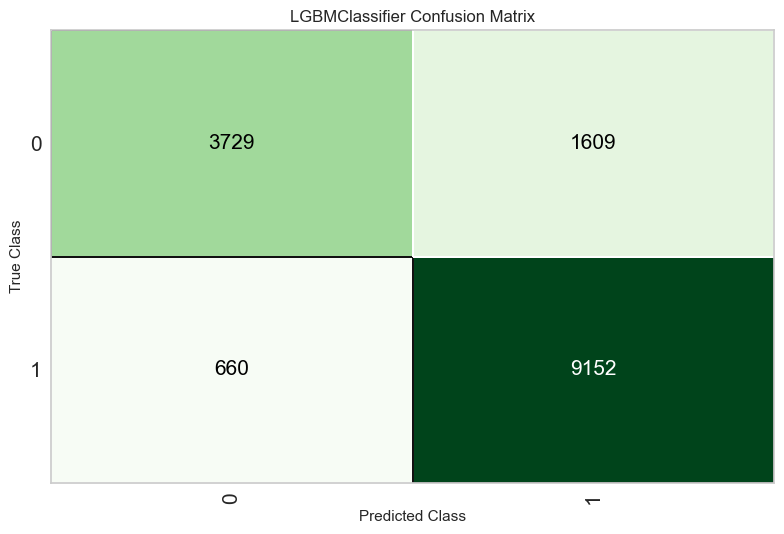

In [57]:
plot_model(best, plot = 'confusion_matrix')

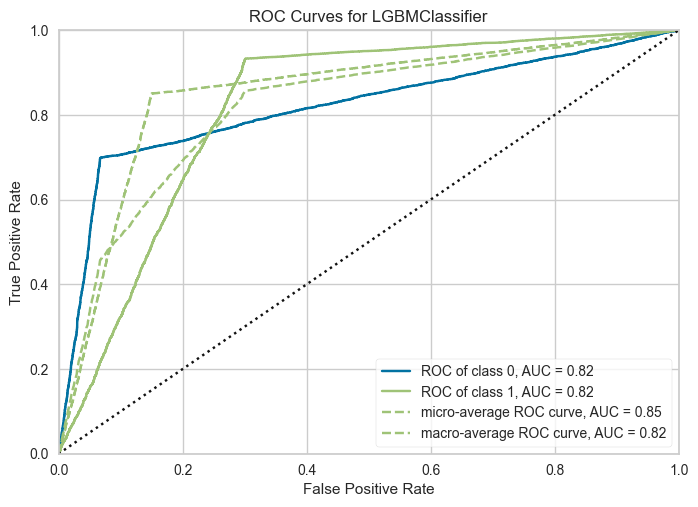

In [58]:
plot_model(best, plot = 'auc')

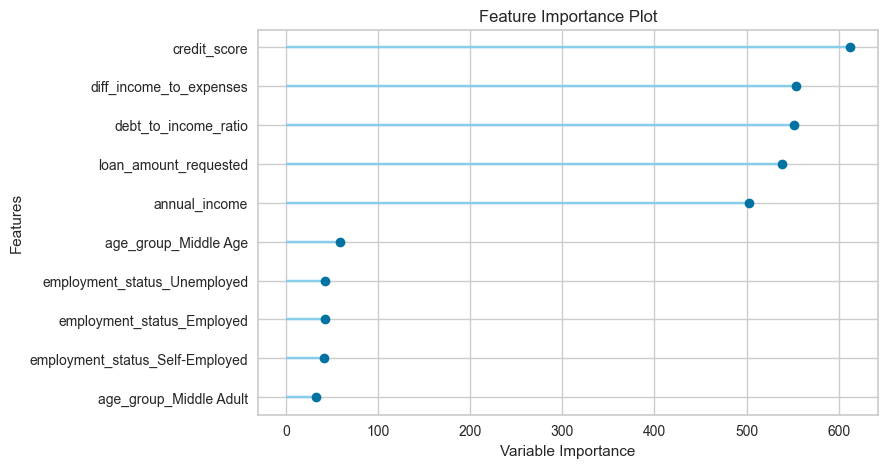

In [59]:
plot_model(best, plot = 'feature')

In [60]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [61]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8502,0.8185,0.9327,0.8505,0.8897,0.6580,0.6648


In [62]:
holdout_pred.head()

,age_group,employment_status,credit_score,loan_amount_requested,annual_income,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status,prediction_label,prediction_score
28564,Middle Adult,Employed,751,24464,86470,4583.833496,0.022817,1,1,0.8594
46072,Middle Age,Employed,768,21897,129465,7198.750000,0.016908,1,1,0.8629
3528,Middle Age,Employed,777,20000,54472,3791.333252,0.002515,0,1,0.8583
14435,Middle Age,Unemployed,716,26020,95562,6981.500000,0.131423,1,1,0.8612
8727,Middle Age,Self-Employed,785,25290,91181,3316.416748,0.123754,1,1,0.8609


In [63]:
new_data = data.copy()
new_data.drop('loan_approval_status', axis=1, inplace=True)
new_data.head()

,age_group,employment_status,credit_score,loan_amount_requested,annual_income,diff_income_to_expenses,debt_to_income_ratio
0,Middle Adult,Employed,743,24535,139901,9125.416667,0.141686
1,Middle Adult,Employed,468,8288,21162,-2277.500000,0.865750
2,Middle Age,Self-Employed,389,10308,27815,-1135.083333,0.497969
3,Middle Adult,Self-Employed,778,33937,137853,8755.750000,0.207525
4,Middle Adult,Employed,752,23360,81753,5164.750000,0.107397


In [64]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age_group,employment_status,credit_score,loan_amount_requested,annual_income,diff_income_to_expenses,debt_to_income_ratio,prediction_label,prediction_score
0,Middle Adult,Employed,743,24535,139901,9125.416992,0.141686,1,0.8483
1,Middle Adult,Employed,468,8288,21162,-2277.500000,0.865750,0,0.7588
2,Middle Age,Self-Employed,389,10308,27815,-1135.083374,0.497969,0,0.8418
3,Middle Adult,Self-Employed,778,33937,137853,8755.750000,0.207525,1,0.8654
4,Middle Adult,Employed,752,23360,81753,5164.750000,0.107397,1,0.8578


In [65]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_group                50499 non-null  category
 1   employment_status        50499 non-null  category
 2   credit_score             50499 non-null  int32   
 3   loan_amount_requested    50499 non-null  int32   
 4   annual_income            50499 non-null  int32   
 5   diff_income_to_expenses  50499 non-null  float32 
 6   debt_to_income_ratio     50499 non-null  float32 
 7   prediction_label         50499 non-null  int32   
 8   prediction_score         50499 non-null  float64 
dtypes: category(2), float32(2), float64(1), int32(4)
memory usage: 1.6 MB


In [66]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit_score',
                                              'loan_amount_requested',
                                              'annual_income',
                                              'diff_income_to_expenses',
                                              'debt_to_income_ratio'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
             

In [67]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['credit_score',
                                             'loan_amount_requested',
                                             'annual_income',
                                             'diff_income_to_expenses',
                                             'debt_to_income_ratio'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [68]:
predictions.to_csv('predictions_label_dataset.csv', index=False)